<img src="http://diannesalerni.com/wp-content/uploads/2016/11/Good-News-Everyone.jpg">

In [2]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/194676675" width="640" height="360" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe> <p><a href="https://vimeo.com/194676675">WalkingEye Robot</a> from <a href="https://vimeo.com/user59907133">kevin</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')

In [4]:
HTML('<iframe src="https://player.vimeo.com/video/238147402" width="640" height="360" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/238147402">Denavit&ndash;Hartenberg parameters</a> from <a href="https://vimeo.com/user59907133">kevin</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')

In [1]:
%matplotlib inline 

import cv2         # opencv itself
import numpy as np # matrix manipulations
import random

from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [4]:
PATH = "block_3_vision/lsn22/stitching_img/"
SHOW_MATCHES = False

# Load the two images
img1 = cv2.imread(PATH + "S1.jpg", -1)
img2 = cv2.imread(PATH + "S2.jpg", -1)

# Transform to RGB
cv2.cvtColor(img1, cv2.COLOR_BGR2RGB, img1)
cv2.cvtColor(img2, cv2.COLOR_BGR2RGB, img2)

# Get their dimensions
height, width = img1.shape[:2]

# Resize them (they are too big)
img1 = cv2.resize(img1, (width / 4, height / 4))
img2 = cv2.resize(img2, (width / 4, height / 4))

# Get the resized image's dimensions
height, width = img1.shape[:2]


# Initiate SIFT detector
# sift = X2D.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

# Note: 'k=2' -> for each keypoint, there can be
# 2 or less matches.
matches = bf.knnMatch(des1,des2, k=2)

###### Here the filter that I have added:
# Filter the matches to remove the wrong ones. This filter 
# removes all pairs of keypoints whose y-coordinate difference
# is lower than the image's height * 0.1.
# The method is implementated below.
matches = filterMatches(kp1, kp2, matches, height, 0.1)


# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# Get the coordinates of the mattching keypoints:
# This method is implemented below.
sP, dP = Tools.pointsFromMatches(kp1, kp2, matches)

# Get the homography and its inverse:
H, mask = cv2.findHomography(sP, dP, cv2.RANSAC)
iH = np.linalg.inv(H)

# Apply the homography to both images:
alignedImg1 = cv2.warpPerspective(img1, H, (width, height), flags = cv2.INTER_LINEAR + cv2.BORDER_CONSTANT)
alignedImg2ToImg1 = cv2.warpPerspective(img2, iH, (width, height), flags = cv2.INTER_LINEAR + cv2.BORDER_CONSTANT)

# Show the results:
plt.imshow(alignedImg1), plt.show()
plt.imshow(alignedImg2ToImg1), plt.show()

NameError: name 'filterMatches' is not defined

2


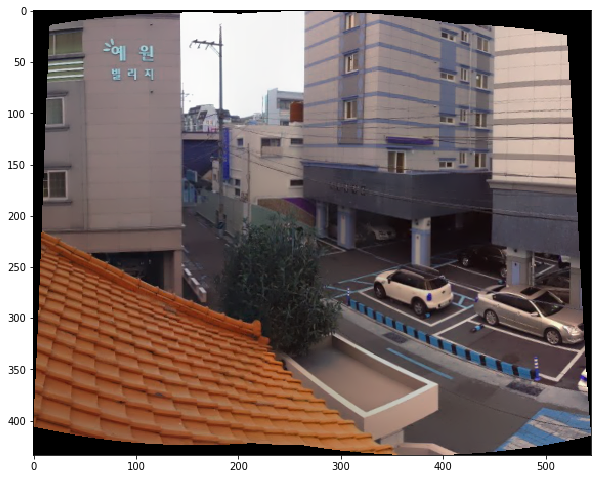

In [14]:
stitcher = cv2.createStitcher(False)
img1 = cv2.imread("block_3_vision/lsn22/stitching_img/S1.jpg")
img2 = cv2.imread("block_3_vision/lsn22/stitching_img/S2.jpg")
img3 = cv2.imread("block_3_vision/lsn22/stitching_img/S3.jpg")
img4 = cv2.imread("block_3_vision/lsn22/stitching_img/S4.jpg")
img5 = cv2.imread("block_3_vision/lsn22/stitching_img/S5.jpg")
result = stitcher.stitch((img1,img2,img3,img4,img5))
print(len(result))
plt.imshow(result[1]);